<a href="https://colab.research.google.com/github/FabricioXC/AnaliseDeDadosComPythonEPandas/blob/main/04_Pandas_Excel_Datas_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Trabalhando com Planilhas do Excel

In [1]:
# Importando a biblioteca Pandas
import pandas as pd

In [2]:
# Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [3]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
# Exibindo as primeiras 5 linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Exibindo as últimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
# Pega uma amostra aleatória do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
30,Recife,2019-01-01,12.35,980,5
168,Natal,2019-01-02,20.22,1036,1
32,Natal,2019-03-17,244.00,854,2
72,Fortaleza,2019-01-01,106.72,1003,4
7,Natal,2019-03-18,886.00,853,4


In [7]:
# Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
# Alterando o tipo de dado da coluna LojaID para object
df['LojaID'] = df['LojaID'].astype('object')

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
# Consultando linhas com valores faltantes
# Obs. O dataset fornecido para esta análise não continha valores nulos.
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [13]:
df['Vendas'].mean()

122.61180089485438

In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
# Substituindo os valores nulos por 0
df['Vendas'].fillna(0, inplace=True)

In [16]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [17]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [18]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

###Criando colunas novas

In [19]:
# Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [23]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [24]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [25]:
# nlargest - Retorna n maiores valores com base em uma coluna
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [26]:
# nsmalest - Retorna n menores valores com base em uma coluna
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
# Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
# Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


###Trabalhando com Datas

In [29]:
# Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [30]:
# Verificando o tipo de dado das colunas
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [31]:
df['Data'] = pd.to_datetime(df['Data'])

In [32]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [33]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [34]:
# Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,6.0,2019
26,Recife,2019-01-01,126.05,980,1,126.05,1.0,2019
29,Recife,2019-01-01,10.18,980,8,81.44,8.0,2019
58,Recife,2019-01-01,8.02,983,2,16.04,2.0,2019
95,Recife,2019-01-01,40.03,982,3,120.09,3.0,2019


In [36]:
#Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
55,Salvador,2019-01-01,36.62,1036,1,36.62,1.0,2019,1,1
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2.0,2019,1,1
43,Recife,2019-01-01,22.29,983,7,156.03,7.0,2019,1,1
17,Recife,2019-02-14,142.45,981,3,427.35,3.0,2019,2,14
104,Salvador,2019-01-01,188.79,1036,3,566.37,3.0,2019,1,1


In [38]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [39]:
# Calculando a diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
99,Aracaju,2018-01-01,139.32,1521,3,417.96,3.0,2018,1,1,0 days
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days
105,Recife,2019-01-01,41.12,980,3,123.36,3.0,2019,1,1,365 days
218,Natal,2019-01-02,189.12,1036,3,567.36,3.0,2019,1,2,366 days
162,Natal,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2,366 days


In [41]:
# Criando a coluna de tirmestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
67,Recife,2019-01-01,179.52,983,5,897.60,5.0,2019,1,1,365 days,1
101,Fortaleza,2019-01-01,11.67,1005,4,46.68,4.0,2019,1,1,365 days,1
90,Recife,2019-01-01,16.04,980,1,16.04,1.0,2019,1,1,365 days,1
11,Natal,2019-02-09,564.00,853,3,1692.00,3.0,2019,2,9,404 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1


In [43]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [44]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1


###Visualização de Dados

In [45]:
# Traz a contagem do número de linhas em que determinado LojaID aparece. Esta contagem é a quantidade de vendas realizadas pela loja representada por este LojaID.
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

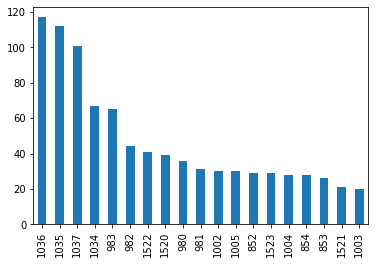

In [46]:
# Gráfico de Barras
df['LojaID'].value_counts(ascending=False).plot.bar();

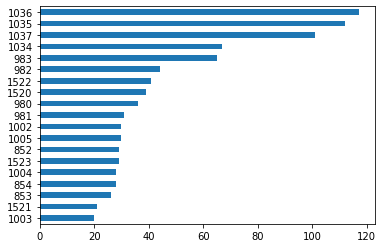

In [47]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

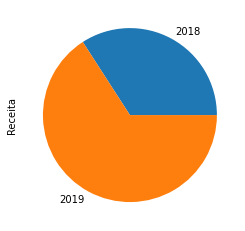

In [48]:
# Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [49]:
# Total vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

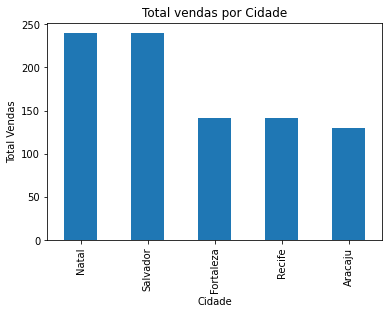

In [50]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

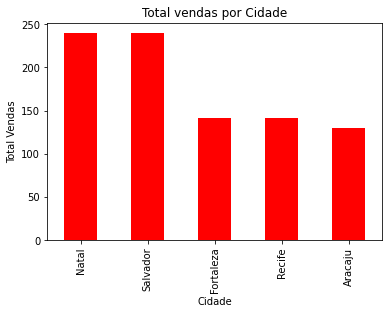

In [51]:
# Alterando a cor das barras
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [52]:
# Alterando o estilo
plt.style.use('ggplot')

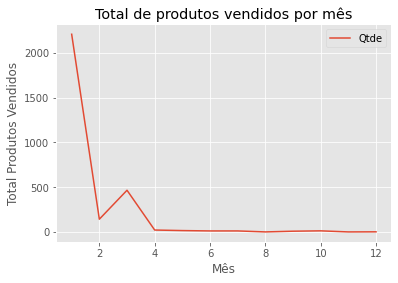

In [53]:
# Gráfico de Linhas
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [54]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [55]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [56]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

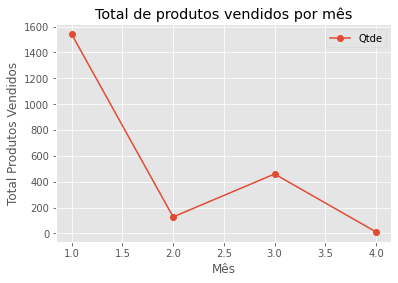

In [57]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o', title='Total de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

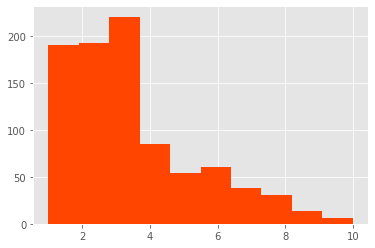

In [58]:
# Histograma
plt.hist(df['Qtde'], color = 'orangered');

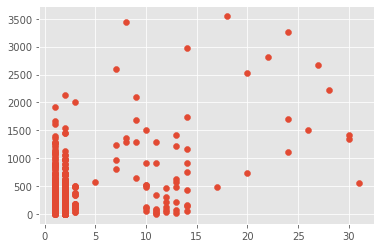

In [59]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

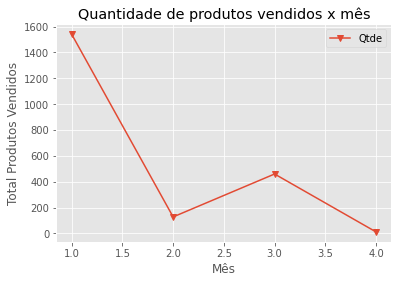

In [61]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();
plt.savefig('Grafico QTDE x MES.png')